## author: Levon Abramian, J4132
## Task 3. Algorithms for unconstrained nonlinear optimization. First- and second-order methods

## The use of first- and second-order methods (Gradient Descent, Non-linear, Conjugate Gradient Descent, Newton’s method and Levenberg-Marquardt algorithm) in the tasks of unconstrained nonlinear optimization

In [1]:
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import plotly.express as px
import numpy as np
import random
import scipy

from tqdm import tqdm

In [2]:
EPS = 0.0001

In [3]:
alpha = random.random()
beta = random.random()
sigma = np.random.normal(size=101)
x_list = np.linspace(0, 1, 101)
y_list = alpha * x_list + beta + sigma

In [4]:
alpha, beta

(0.7148896112918255, 0.5012884526880783)

In [5]:
class Point:

    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Point(x, y)

    def __hash__(self):
        return 1

    def __str__(self):
        return f'{self.x}, {self.y}'

    def __repr__(self):
        return f'{self.x}, {self.y}'

    def __rmul__(self, other):
        x = self.x * other
        y = self.y * other
        return Point(x, y)

    def __truediv__(self, other):
        x = self.x / other
        y = self.y / other
        return Point(x, y)

    def __sub__(self, other):
        x = self.x - other.x
        y = self.y - other.y
        return Point(x, y)

In [6]:
def F_1(x, a, b):
    return a * x + b

def F_2(x, a, b):
    return a / (1 + b * x)

def D(a, b, F):
    D = 0
    for xi, yi in zip(x_list, y_list):
        D += (F(xi, a, b) - yi) ** 2
    return D

In [112]:
def derivative_a_1(a: float, b: float):
    return lambda x, y: 2 * (a * x + b - y) * x

def derivative_b_1(a: float, b: float):
    return lambda x, y: 2 * (a * x + b - y)

def derivative_a_2(a: float, b: float):
    return lambda x, y: 2 * (a / (1 + b * x) - y) / (1 + b * x)

def derivative_b_2(a: float, b: float):
    return lambda x, y: 2 * a * b * (a / (1 + b * x) - y) / (1 + b * x)**2


def gradient_desent(x: np.array, y: np.array, der_a, der_b, lr: float = 0.001, eps=0.001, max_iterations=5000):
    w = Point(0.01, 0.01)

    costs = []
    points = []
    
    y_pred = F_1(x, w.x, w.y)
    for i in tqdm(range(max_iterations)):
        da = sum(der_a(w.x, w.y)(x=x, y=y)) / x_list.size
        db = sum(der_b(w.x, w.y)(x=x, y=y)) / y_list.size
        # print(da, db)
        w = w - lr * Point(da, db)
        y_pred = F_1(x, w.x, w.y)
        new_cost = sum((y_pred - y) ** 2)
        costs.append(new_cost)
        if i % 100 == 0:
            points.append(w)
    return points, costs

In [123]:
# points, costs = gradient_desent(x_list, y_list, derivative_a_1, derivative_b_1)
points, costs = gradient_desent(x_list, y_list, derivative_a_2, derivative_b_2)

100%|██████████| 5000/5000 [00:00<00:00, 30356.90it/s]


In [124]:
points[-1]

0.9019062838424371, 0.014835605159998433

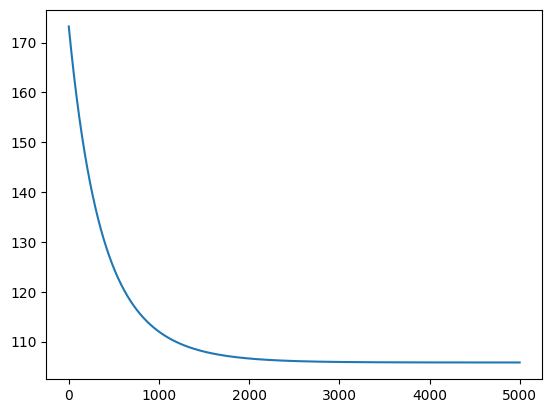

In [125]:
plt.plot(costs)

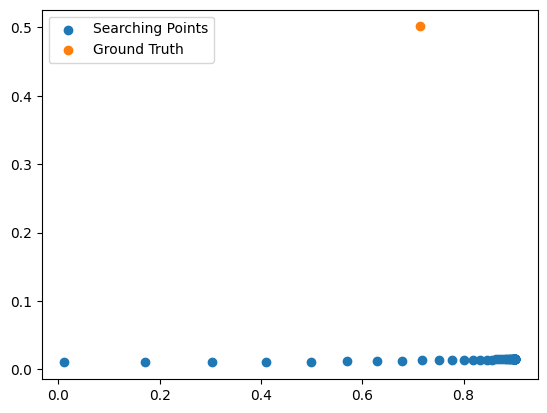

In [126]:
xs = [point.x for point in points]
ys = [point.y for point in points]
plt.scatter(xs, ys, label='Searching Points')
plt.scatter(alpha, beta, label='Ground Truth')
plt.legend()

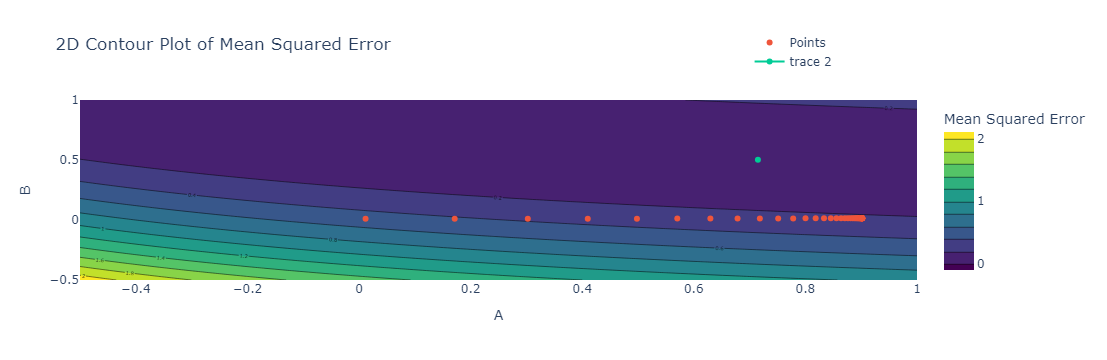

In [127]:
import numpy as np
import plotly.graph_objects as go

# Define range for predictions and true values
x = np.linspace(-0.5, 1, 100)
y = np.linspace(-0.5, 1, 100)

# Create a meshgrid for the predictions and true values
X, Y = np.meshgrid(x, y)

# Calculate Mean Squared Error (MSE) at each point
# For this example, assume true values are at 0
# MSE = (alpha * X + beta - Y)**2
MSE = (alpha / (1 + beta * X) - Y)**2

fig = go.Figure(data =
    go.Contour(
        z=MSE,
        x=x,  # x coordinates
        y=y,  # y coordinates
        colorbar=dict(title='Mean Squared Error'),
        contours=dict(
            showlabels=True,  # Label contours with their values
            labelfont=dict(size=5),
            size=20  # Number of contour levels
        ),
        colorscale='Viridis'
    )
)

# Add points of interest
fig.add_trace(go.Scatter(
    x=[point.x for point in points],
    y=[point.y for point in points],
    mode='markers+text',
    # marker=dict(size=10, color='red'),
    # textposition="top center",
    name='Points'
))

# Add points of interest
fig.add_trace(go.Scatter(
    x=[alpha],
    y=[beta],
    # mode='markers+text',
    # marker=dict(size=10, color='red'),
    # textposition="top center",
    # name='Points'
))

# Update layout
fig.update_layout(
    title='2D Contour Plot of Mean Squared Error',
    xaxis_title='A',
    yaxis_title='B',
    legend=dict(
        x=0.8,  # X position (0-1)
        y=1.4,  # Y position (0-1)
        traceorder='normal',  # Normal order
        orientation='v'  # Vertical orientation
    )
)

# Show the figure
fig.show()


# Conclusion